<a href="https://colab.research.google.com/github/carsonasmith17/labs/blob/main/Bootsrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1**

Imagine rolling two dice,
 and
. Let
 be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of
? Plot the probability and cumulative distribution functions for
. Compute this by hand and simulate it using the law of large numbers.

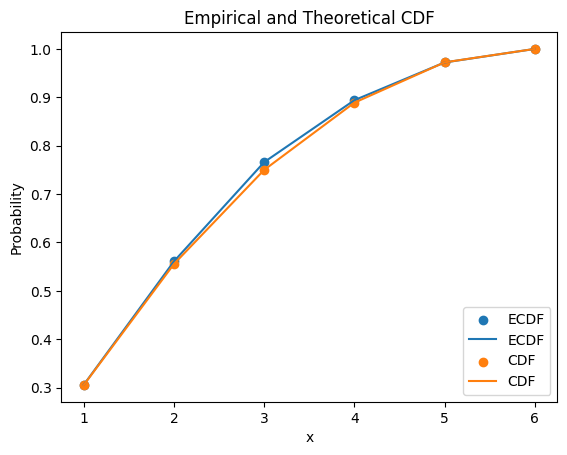

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

faces = np.array([1,2,3,4,5,6])

# Explicit calculation:
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i],faces[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)
# Bootstrap simulation:
N = 1000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= faces[i] )

# Comparison:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

Imagine rolling three dice,
,
, and
. Let
 be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of
? Plot the probability and cumulative distribution functions for
. I recommend using simulations and the law of large numbers.

Expected value:  3.4608


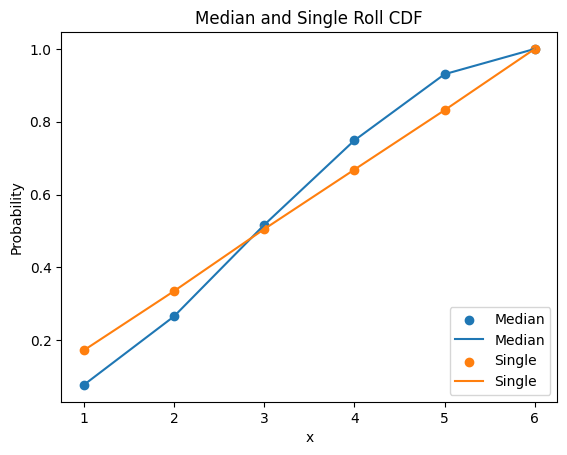

In [5]:
faces = np.array([1,2,3,4,5,6])
N = 5000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)
med_roll = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= faces[i] )
    single[i] = (1/N)*np.sum( d1 <= faces[i] )

expected_value = np.sum(med_roll)/N

# # Comparison:
plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers. (Hint: The while loop might be useful in this case.)

                  0
count  50000.000000
mean       4.203440
std        3.256149
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       35.000000


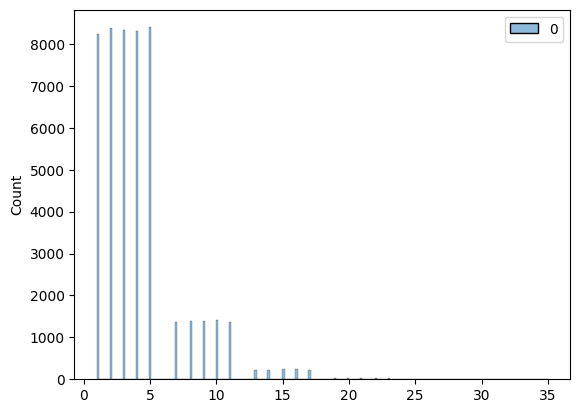

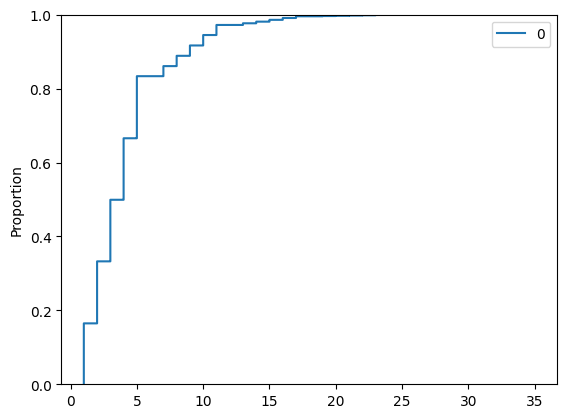

In [4]:
N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

results = pd.DataFrame(results)

print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()

**Q2**

In [12]:
df = pd.read_csv('diabetes_hw.csv')
df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1

Cross tabulate treatment and outcome.

In [13]:
## 1.
print(pd.crosstab(df['treatment'], df['outcome']), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True, normalize=True), '\n')

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 



Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

In [14]:
## 2.
print('lifestyle success rate: ', 125/(125+109), '\n')
print('met success rate: ', 112/(112+120), '\n')
print('rosi success rate: ', 143/(143+90), '\n')

lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 

lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



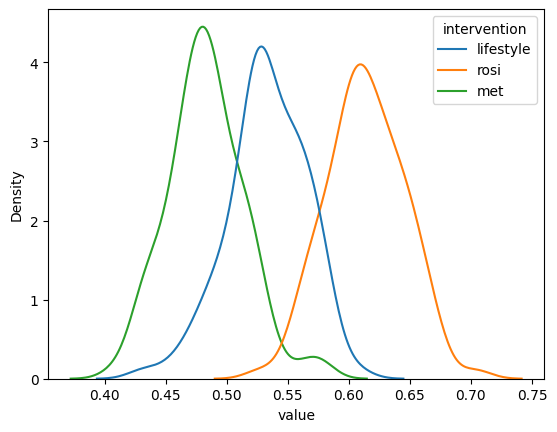

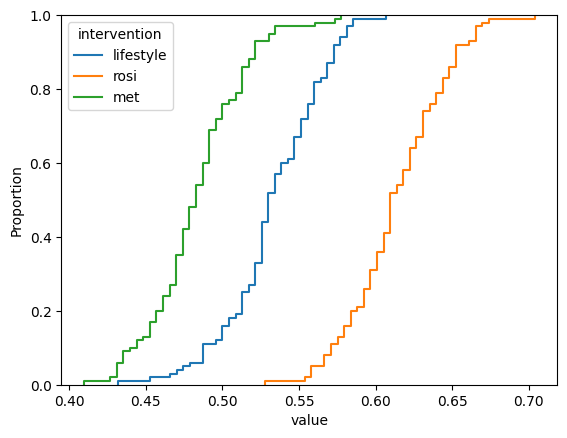

In [11]:
## 3.
df_lif = df.loc[ df['treatment'] == 'lifestyle', :]
df_ros = df.loc[ df['treatment'] == 'rosi', :]
df_met = df.loc[ df['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    df_lif_t = df_lif.sample( df_lif.shape[0], axis=0, replace=True)
    df_ros_t = df_ros.sample( df_ros.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)
    #
    fx_lif_t = np.mean(df_lif_t['success'])
    fx_ros_t = np.mean(df_ros_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    #
    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'})
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

Rosi is most effective, then lifestyle, then metformin.

Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

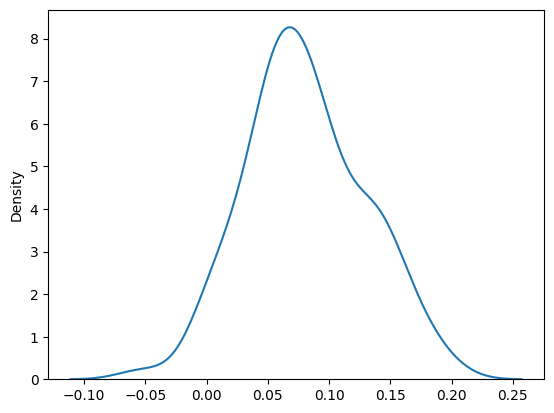

90% Confidence interval, rosi minus lifestyle:  0.006729393639264869 ,  0.1573438245112065


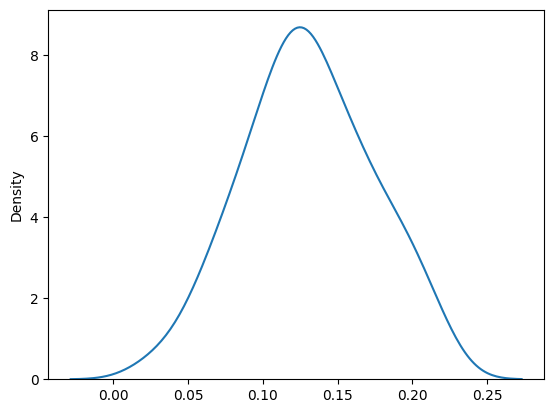

90% Confidence interval, rosi minus metformin:  0.061873797543288436 ,  0.20431959449459816


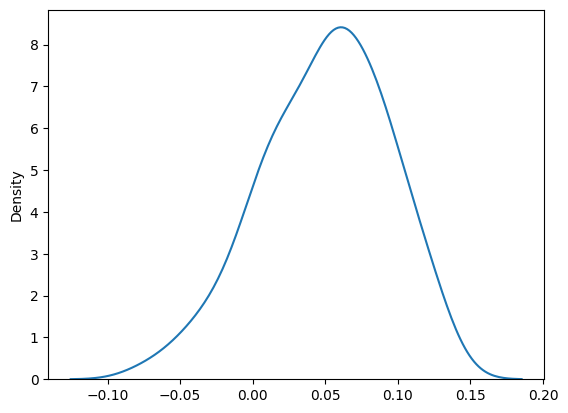

90% Confidence interval, lifestyle minus metformin:  -0.02600758915414085 ,  0.11617852932508112


In [15]:
rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))

Rosi appears more effective than Lifestyle, as the 90% confidence interval excludes zero. The difference in effect sizes is estimated to be between 0.006 and 0.16 with 90% confidence. Similarly, Rosi seems superior to Metformin, with a 90% confidence interval that also excludes zero. The difference in effect sizes is estimated to range from 0.057 to 0.187. In contrast, there is no statistically significant difference between Lifestyle and Metformin, as the 90% confidence interval includes zero. The difference in effect sizes is estimated to fall between -0.03 and 0.125 with 90% confidence.